# Lab #1

Andrea Monzon
23006810

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema #1

In [40]:
def active_color(img, color):
  alto = img.shape[0]
  ancho = img.shape[1]

  monocromo = np.zeros((alto, ancho, 3))

  for i in range(0, alto):
    for j in range(0, ancho):
      pixel = img[i,j]

      blue = pixel[2]
      green = pixel[1]
      red = pixel[0]

      if color == 1:
        monocromo[i,j] = [0, 0, blue]
      elif color == 2:
        monocromo[i,j] = [0, green, 0]
      elif color == 3:
        monocromo[i,j] = [red, 0, 0]
      elif color == 10:
        monocromo[i,j] = [red, green, 0]
      elif color == 20:
        monocromo[i,j] = [0, green, blue]
      elif color == 30:
        monocromo[i,j] = [red, 0, blue]
  return monocromo.astype(np.uint8)

In [33]:
img_1 = cv2.imread("./city.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

In [41]:
img_p1 = active_color(img_1, 2)

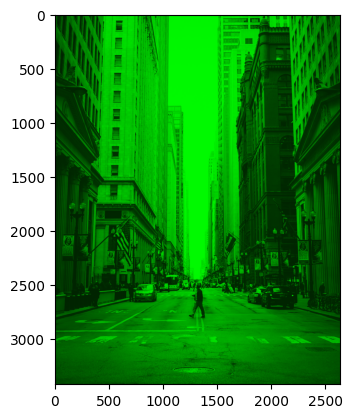

In [42]:
plt.imshow(img_p1)
plt.show()

## Problema  #2

In [43]:
imgR = cv2.imread("./imagen1/imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
imgG = cv2.imread("./imagen1/imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
imgB = cv2.imread("./imagen1/imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

In [44]:
imgR

array([[  0,   0,   0, ...,   2,   0,   0],
       [  2,   2,   2, ...,   2,   3,   3],
       [  1,   1,   1, ...,   1,   0,   0],
       ...,
       [230, 229, 252, ...,   1,  10,  10],
       [222, 222, 252, ...,   1,   0,   0],
       [228, 218, 242, ...,   0,   0,   0]], dtype=uint8)

In [47]:
def gray3_toRGB(imgR, imgG, imgB):
  alto = imgR.shape[0]
  ancho = imgR.shape[1]

  rgb_img = np.zeros((alto, ancho, 3))

  for i in range(0, alto):
    for j in range(0, ancho):
      pixelR = imgR[i,j]
      pixelG = imgG[i,j]
      pixelB = imgB[i,j]
      rgb_img[i,j] = [pixelR, pixelG, pixelB]

  return rgb_img.astype(np.uint8)


In [48]:
rgb_img = gray3_toRGB(imgR, imgG, imgB)

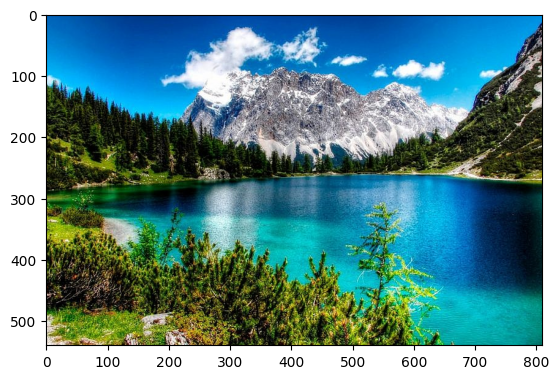

In [49]:
plt.imshow(rgb_img)
plt.show()

## Problema 3

In [50]:
def RGBtoGray3 (img):
  alto = img.shape[0]
  ancho = img.shape[1]

  grayR = np.zeros((alto, ancho))
  grayG = np.zeros((alto, ancho))
  grayB = np.zeros((alto, ancho))

  for i in range(0, alto):
    for j in range(0, ancho):
      pixel = img[i,j]

      grayR[i,j] = pixel[0]
      grayG[i,j] = pixel[1]
      grayB[i,j] = pixel[2]


  return grayR.astype(np.uint8), grayG.astype(np.uint8), grayB.astype(np.uint8)

In [51]:
img_3 = cv2.imread("./holiday_desserts.jpg")
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

In [52]:
grayR, grayG, grayB = RGBtoGray3(img_3)

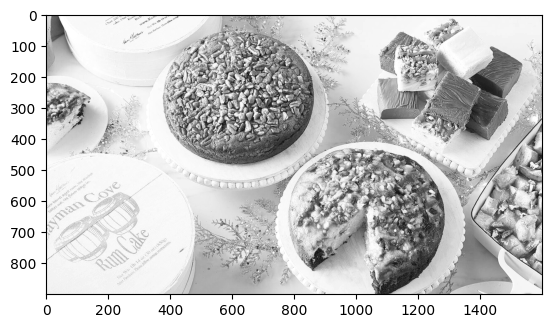

In [54]:
plt.imshow(grayR, cmap='gray')
plt.show()

## Problema 4

In [73]:
def cal_histogram(img):
  histogram = np.zeros(256)

  alto = img.shape[0]
  ancho = img.shape[1]

  histogram = np.zeros(256)

  for i in range(0, alto):
    for j in range(0, ancho):
      pixel = img[i,j]
      histogram[pixel] += 1

  return histogram

In [106]:
def img_to_gray(img):
  alto = img.shape[0]
  ancho = img.shape[1]

  gris_aritmetico = np.zeros((alto,ancho,1))

  for i in range(0, alto):
    for j in range(0, ancho):
      pixel = img[i,j]

      gris_aritmetico[i,j] = np.mean(pixel)
  return gris_aritmetico.astype(np.uint8)

In [109]:
def hist_color_gray(img):

  fig, ax = plt.subplots(2, 2, figsize=(12,10))

  plt.subplot(2, 2, 1)
  histR = cal_histogram(img[:,:,0])
  media = np.mean(img[:,:,0])
  plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Media = {media:.2f}')
  plt.plot(histR, color='red')
  plt.xlabel('Intensidad de pixel - R')
  plt.ylabel('Pixeles totales')
  plt.title('Histograma de imagen en R')

  plt.subplot(2, 2, 2)
  histG = cal_histogram(img[:,:,1])
  media = np.mean(img[:,:,1])
  plt.axvline(media, color='green', linestyle='dashed', linewidth=1, label=f'Media = {media:.2f}')
  plt.plot(histG, color='green')
  plt.xlabel('Intensidad de pixel - G')
  plt.ylabel('Pixeles totales')
  plt.title('Histograma de imagen en G')

  plt.subplot(2, 2, 3)
  histB = cal_histogram(img[:,:,2])
  media = np.mean(img[:,:,2])
  plt.axvline(media, color='blue', linestyle='dashed', linewidth=1, label=f'Media = {media:.2f}')
  plt.plot(histB, color='blue')
  plt.xlabel('Intensidad de pixel - B')
  plt.ylabel('Pixeles totales')
  plt.title('Histograma de imagen en B')

  plt.subplot(2, 2, 4)
  img_gray = img_to_gray(img)
  histGray = cal_histogram(img_gray)
  media = np.mean(img_gray)
  plt.axvline(media, color='gray', linestyle='dashed', linewidth=1, label=f'Media = {media:.2f}')
  plt.plot(histGray, color='gray')
  plt.xlabel('Intensidad de pixel - Gray')
  plt.ylabel('Pixeles totales')
  plt.title('Histograma de imagen en Gray')

  plt.show()



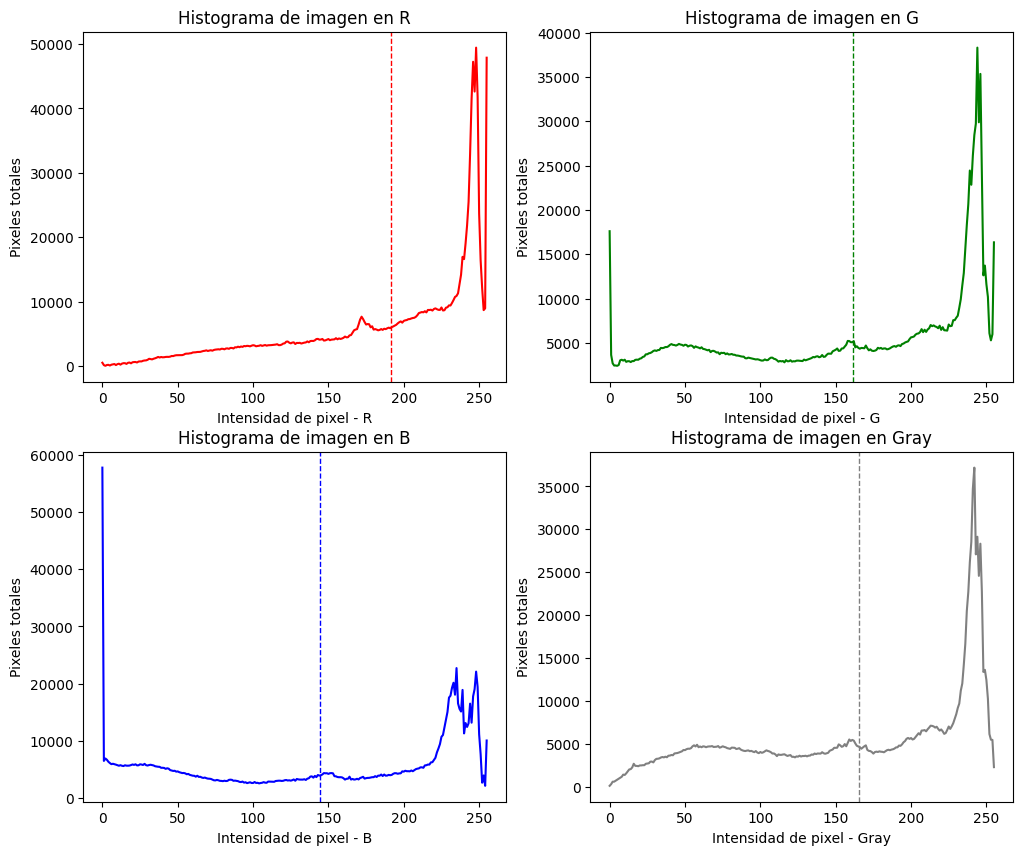

In [110]:
hist_color_gray(img_3)